In [5]:
import pandas as pd
from pyspark.sql.functions import col,split,concat,concat_ws,size
import re
import pyspark
import geopandas
import matplotlib.pyplot as plt

In [25]:
ds = sc.textFile("s3://mukiawsproject/sample_geo.txt")
rdd=ds.map(lambda x: (re.split('[\t]',x))).cache()
rdd=rdd.filter(lambda x:len(x)!=1)
rdd=rdd.filter(lambda x:x[0]!='Latitude')
rdd=rdd.map(lambda x:(float(x[0]),float(x[1]),float(x[2])))


In [28]:
dfx = sqlContext.createDataFrame(data=rdd)


In [29]:
dfx.show(10)

+-----------+------------+----+
|         _1|          _2|  _3|
+-----------+------------+----+
|37.77253945|-77.49954987| 1.0|
|42.09013298|-87.68915558| 2.0|
|39.56341754|-75.58753204| 3.0|
|39.45302347|-87.69374084| 4.0|
| 38.9537989|-77.01656342| 5.0|
|39.90031211|-75.74486542| 6.0|
|36.24009843|-115.1586914| 7.0|
|26.11330818|-80.09202576| 8.0|
|34.27036086|-118.3162918| 9.0|
|38.81664153|-97.62573242|10.0|
+-----------+------------+----+
only showing top 10 rows



In [30]:
dfx=dfx.select(concat('_1').alias("latitude"),concat('_2').alias("longitude"),concat('_3').alias("locationID"))

In [31]:
dfx.show(10)

+-----------+------------+----------+
|   latitude|   longitude|locationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|       1.0|
|42.09013298|-87.68915558|       2.0|
|39.56341754|-75.58753204|       3.0|
|39.45302347|-87.69374084|       4.0|
| 38.9537989|-77.01656342|       5.0|
|39.90031211|-75.74486542|       6.0|
|36.24009843|-115.1586914|       7.0|
|26.11330818|-80.09202576|       8.0|
|34.27036086|-118.3162918|       9.0|
|38.81664153|-97.62573242|      10.0|
+-----------+------------+----------+
only showing top 10 rows



In [32]:
dfx=dfx.filter(dfx.latitude!=0)
dfx=dfx.filter(dfx.longitude!=0)

In [33]:
dfx.show(10)

+-----------+------------+----------+
|   latitude|   longitude|locationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|       1.0|
|42.09013298|-87.68915558|       2.0|
|39.56341754|-75.58753204|       3.0|
|39.45302347|-87.69374084|       4.0|
| 38.9537989|-77.01656342|       5.0|
|39.90031211|-75.74486542|       6.0|
|36.24009843|-115.1586914|       7.0|
|26.11330818|-80.09202576|       8.0|
|34.27036086|-118.3162918|       9.0|
|38.81664153|-97.62573242|      10.0|
+-----------+------------+----------+
only showing top 10 rows



In [34]:
dfx=dfx.toPandas();
dfx.to_csv('s3://mukiawsproject/sample_geo.csv',header=None)

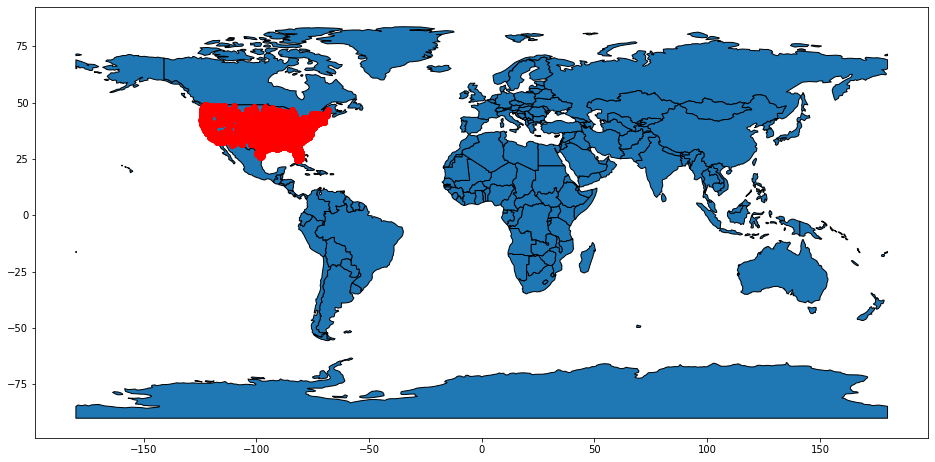

In [35]:
gdf = geopandas.GeoDataFrame(
    dfx, geometry=geopandas.points_from_xy(dfx.longitude, dfx.latitude))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    edgecolor='black',figsize=(16,16))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()